# 训练您的第一个神经网络：基本分类Fashion MNIST

本指南会训练一个对服饰（例如运动鞋和衬衫）图像进行分类的神经网络模型。即使您不了解所有细节也没关系，本教程只是简要介绍了一个完整的 TensorFlow 程序，而且后续我们会详细介绍。

本指南使用的是[tf.keras](https://tensorflow.google.cn/guide/keras)，它是一种用于在 TensorFlow 中构建和训练模型的高阶 API。

In [4]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass


In [5]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


## 导入MNIST数据集

本指南使用[Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)数据集，其中包含 70000 张灰度图像，涵盖 10 个类别。以下图像显示了单件服饰在较低分辨率（28x28 像素）下的效果：

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST 样本</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST 的作用是成为经典 MNIST 数据集的简易替换，后者通常用作计算机视觉机器学习程序的“Hello, World”入门数据集。[MNIST](http://yann.lecun.com/exdb/mnist/)数据集包含手写数字（0、1、2 等）的图像，这些图像的格式与我们在本教程中使用的服饰图像的格式相同。

本指南使用 Fashion MNIST 实现多样化，并且它比常规 [MNIST](http://yann.lecun.com/exdb/mnist/)更具挑战性。这两个数据集都相对较小，用于验证某个算法能否如期正常运行。它们都是测试和调试代码的良好起点。

我们将使用 60000 张图像训练网络，并使用 10000 张图像评估经过学习的网络分类图像的准确率。您可以从 TensorFlow 直接访问 Fashion MNIST，只需导入和加载数据即可：

In [6]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


加载数据返回4个NumPy数组：

- `train_images`和`train_labels`数组是训练集，即模型用于学习的数据。
- 测试集 `test_images` 和 `test_labels` 数组用于测试模型。

图像为28x28的NumPy数组，像素值介于0到255之间。标签是整数数组，介于0到9之间。这些标签对应于图像代表的服饰所属的类别：

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

每个图像都映射到一个标签，由于类名不包含在数据集中，因此将它们存储在此处以便在绘制图像时使用：

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 探索数据

我们先探索数据集的格式，然后再训练模型。以下内容显示训练集中有 60000 张图像，每张图像都表示为 28x28 像素：

In [8]:
train_images.shape

(60000, 28, 28)

同样，训练集中有60,000个标签：

In [9]:
len(train_labels)

60000

每个标签都是0到9之间的整数：

In [10]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

测试集中有10,000个图像。同样，每个图像表示为28 x 28像素：

In [11]:
test_images.shape

(10000, 28, 28)

测试集包含10,000个图像标签：

In [12]:
len(test_labels)

10000

## 预处理数据

在训练网络之前必须对数据进行预处理。 如果您检查训练集中的第一个图像，您将看到像素值落在0到255的范围内：

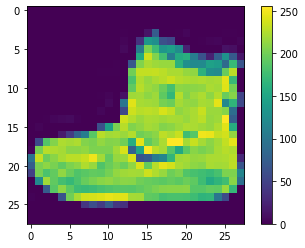

In [13]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

我们将这些值缩小到 0 到 1 之间，然后将其馈送到神经网络模型。为此，将图像组件的数据类型从整数转换为浮点数，然后除以 255。以下是预处理图像的函数：

务必要以相同的方式对训练集和测试集进行预处理：

In [14]:
train_images = train_images / 255.0

test_images = test_images / 255.0

为了验证数据的格式是否正确以及我们是否已准备好构建和训练网络，让我们显示训练集中的前25个图像，并在每个图像下方显示类名。

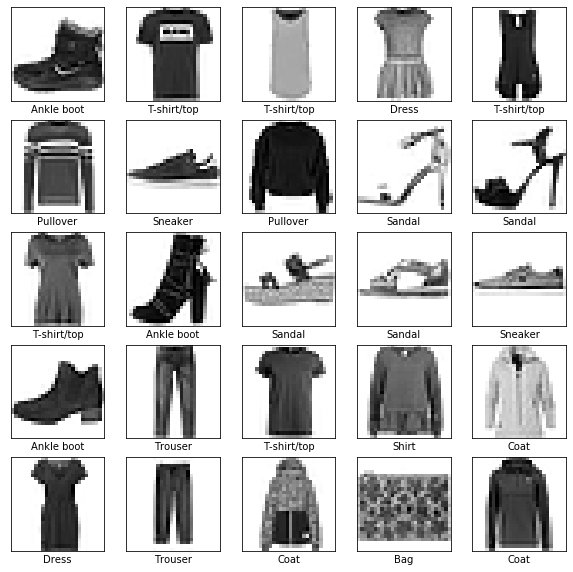

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 构建模型

构建神经网络需要配置模型的层，然后编译模型。

### 设置图层

神经网络的基本构造块是层。层从馈送到其中的数据中提取表示结果。希望这些表示结果有助于解决手头问题。

大部分深度学习都会把简单的层连在一起。大部分层（例如 `tf.keras.layers.Dense`）都具有在训练期间要学习的参数。

In [16]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

该网络中的第一层`tf.keras.layers.Flatten`将图像的格式从二维数组（28 x 28像素）转换为一维数组（28 * 28 = 784像素））。可以将该层视为图像中像素未堆叠的行，并排列这些行。该层没有要学习的参数；它只改动数据的格式。

在像素被展平之后，网络由两个`tf.keras.layers.Dense`层的序列组成。这些是密集连接或全连接的神经层。第一个`Dense`层有128个节点（或神经元）。第二个（也是最后一个）层是具有 10 个节点的 `softmax` 层，该层会返回一个具有 10 个概率得分的数组，这些得分的总和为 1。每个节点包含一个得分，表示当前图像属于 10 个类别中某一个的概率。

### 编译模型

模型还需要再进行几项设置才可以开始训练。这些设置会添加到模型的编译步骤：

- 损失函数：衡量模型在训练期间的准确率。我们希望尽可能缩小该函数，以“引导”模型朝着正确的方向优化。
- 优化器：根据模型看到的数据及其损失函数更新模型的方式。
- 度量标准：用于监控训练和测试步骤。以下示例使用准确率，即图像被正确分类的比例。

In [17]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 训练模型

训练神经网络模型需要以下步骤：

1. 将训练数据馈送到模型中，在本示例中为 `train_images` 和 `train_labels` 数组。
2. 模型学习将图像与标签相关联。
3. 我们要求模型对测试集进行预测，在本示例中为 test_images 数组。我们会验证预测结果是否与 `test_labels` 数组中的标签一致。

要开始训练，请调用 `model.fit` 方法，使模型与训练数据“拟合”：

In [18]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.5018 - accuracy: 0.8239
Epoch 2/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.3775 - accuracy: 0.8632
Epoch 3/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.3386 - accuracy: 0.8764
Epoch 4/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.3133 - accuracy: 0.8855
Epoch 5/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.2947 - accuracy: 0.8916
Epoch 6/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.2815 - accuracy: 0.8958
Epoch 7/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.2680 - accuracy: 0.9007
Epoch 8/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.2592 - accuracy: 0.9034
Epoch 9/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.2482 - accuracy: 0.9073
Epoch 10/10
60

在模型训练期间，系统会显示损失和准确率指标。该模型在训练数据上的准确率达到 0.88（即 88%）。

## 评估精度

接下来，比较模型在测试数据集上的表现情况：

In [19]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/1 - 0s - loss: 0.2363 - accuracy: 0.8807

Test accuracy: 0.8807


结果表明，模型在测试数据集上的准确率略低于在训练数据集上的准确率。训练准确率和测试准确率之间的这种差异表示出现过拟合(*overfitting*)。如果机器学习模型在新数据上的表现不如在训练数据上的表现，也就是泛化性不好，就表示出现过拟合。

## 预测

模型经过训练后，我们可以使用它对一些图像进行预测。

In [20]:
predictions = model.predict(test_images)

在本示例中，模型已经预测了测试集中每张图像的标签。我们来看看第一个预测：

In [21]:
predictions[0]

array([4.4182694e-10, 4.7752291e-10, 2.7098121e-10, 1.9605107e-12,
       1.6680498e-07, 4.2813933e-03, 5.0856929e-08, 9.5550433e-02,
       3.0341369e-08, 9.0016788e-01], dtype=float32)

预测结果是一个具有 10 个数字的数组，这些数字说明模型对于图像对应于 10 种不同服饰中每一个服饰的“confidence（置信度）”。我们可以看到哪个标签的置信度值最大：

In [22]:
np.argmax(predictions[0])

9

因此，模型非常确信这张图像是踝靴或属于 class_names[9]。我们可以检查测试标签以查看该预测是否正确：

In [23]:
test_labels[0]

9

我们可以将该预测绘制成图来查看全部 10 个通道

In [24]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

让我们看看第0个图像、预测和预测数组。正确的预测标签为蓝色，错误的预测标签为红色。数字表示预测标签的百分比（总计为 100）。

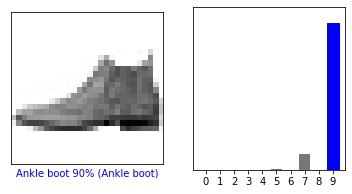

In [25]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

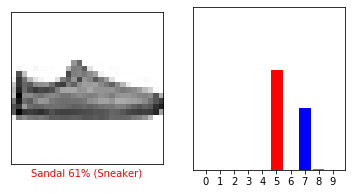

In [26]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

我们用它们的预测绘制几张图像。 请注意，即使置信度非常高，也有可能预测错误。

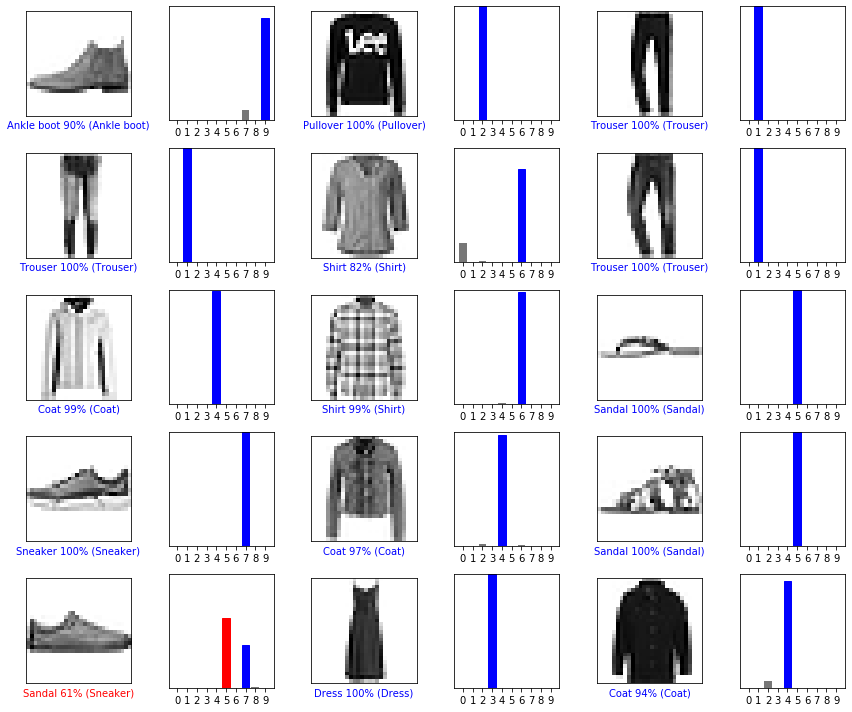

In [27]:
# 绘制前X个测试图像，预测标签和真实标签。 
# 用蓝色标记正确的预测，用红色标记错误的预测。
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

最后，使用训练的模型对单个图像进行预测。

In [28]:
# 从测试数据集中获取图像
img = test_images[1]

print(img.shape)

(28, 28)


`tf.keras`模型已经过优化，可以一次性对样本批次或样本集进行预测。因此，即使我们使用单个图像，仍需要将其添加到列表中：

In [29]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


现在预测此图像的正确标签：

In [30]:
predictions_single = model.predict(img)

print(predictions_single)

[[2.82789970e-05 3.87235105e-10 9.99138594e-01 4.55325999e-10
  7.18739524e-04 4.01309645e-11 1.14404735e-04 1.00098881e-15
  3.02047880e-08 8.71764791e-13]]


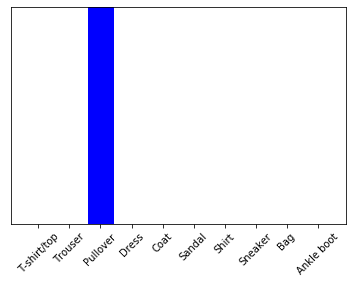

In [31]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`model.predict`返回一组列表，每个列表对应批次数据中的每张图像。（仅）获取批次数据中相应图像的预测结果：

In [32]:
np.argmax(predictions_single[0])

2

模型预测标签和前面的一样。